In [12]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder , RobustScaler, MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from numpy.random import seed , randn
from numpy import mean
from numpy import std
from sklearn.svm import SVR

In [13]:
#Importing data set
# label_encoder = LabelEncoder()
df = pd.read_csv("car_price.csv")
X = df [['km']]
y = df [['price']]

df

,make_model,body_type,Body Color,km,hp,Transmission,Extras,price
0,Audi A3,Station wagon,Orange,5558,85,Manual,"Alloy wheels,Voice Control",5555
1,Audi A1,Sedans,White,115000,85,Manual,"Alloy wheels,Winter tyres",8999
2,Audi A1,Sedans,Black,192000,85,Manual,Alloy wheels,10000
3,Audi A1,Sedans,Red,85000,85,Manual,"Catalytic Converter,Voice Control,Winter tyres",10300
4,Audi A1,Compact,White,130000,85,Manual,Alloy wheels,10490
...,...,...,...,...,...,...,...,...
4795,Audi A3,Compact,Silver,7,85,Semi-automatic,"Alloy wheels,Roof rack,Sport seats,Sport suspe...",38495
4796,Audi A3,Compact,Grey,7,85,Semi-automatic,"Alloy wheels,Sport seats,Sport suspension",38725
4797,Audi A3,Compact,Grey,7,85,Semi-automatic,"Alloy wheels,Sport seats,Sport suspension",39575
4798,Audi A3,Compact,Grey,750,85,Semi-automatic,"Alloy wheels,Roof rack,Sport seats,Sport suspe...",41495


In [14]:
#feature scalling
sc_X = StandardScaler()
sc_y = StandardScaler()
X=sc_X.fit_transform(X)
y=sc_y.fit_transform(y)

In [32]:
rbfRegressor = SVR(kernel='rbf')
rbfRegressor.fit(X,y)
linearRegressor = SVR(kernel='linear')
linearRegressor.fit(X,y)
polyRegressor = SVR(kernel='poly')
polyRegressor.fit(X,y)

C:\Users\kotam\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kotam\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kotam\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR(kernel='poly')

In [33]:
rbf_y_pred = sc_y.inverse_transform((rbfRegressor.predict(sc_X.transform(np.array([[6.5]])))))
rbf_y_pred

array([24100.94224589])

In [34]:
linear_y_pred = sc_y.inverse_transform((linearRegressor.predict(sc_X.transform(np.array([[6.5]])))))
linear_y_pred

array([22207.38616639])

In [35]:
poly_y_pred = sc_y.inverse_transform((polyRegressor.predict(sc_X.transform(np.array([[6.5]])))))
poly_y_pred

array([20074.95394377])

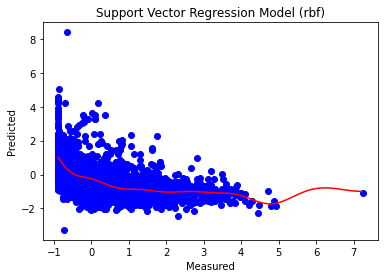

In [29]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color ='blue')
plt.plot(X_grid, regressor.predict(X_grid), color = 'red' )
plt.title('Support Vector Regression Model (rbf)')
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.show()

In [36]:
from sklearn import metrics

print('Linear Kernel Mean Absolute Error (MAE): %f' %
metrics.mean_absolute_error(y, linearRegressor.predict(X)))
print('Linear Kernel Root Mean Squared Error (RMSE): %f' %
np.sqrt(metrics.mean_squared_error(y, linearRegressor.predict(X))))
print('Polynomial Kernel Mean Absolute Error (MAE): %f' %
metrics.mean_absolute_error(y, polyRegressor.predict(X)))
print('Polynomial Kernel Root Mean Squared Error (RMSE): %f' %
np.sqrt(metrics.mean_squared_error(y, polyRegressor.predict(X))))
print('RBF Kernel Mean Absolute Error (MAE): %f' %
metrics.mean_absolute_error(y, rbfRegressor.predict(X)))
print('RBF Kernel Root Mean Squared Error (RMSE): %f' %
np.sqrt(metrics.mean_squared_error(y, rbfRegressor.predict(X))))

Linear Kernel Mean Absolute Error (MAE): 0.625282
Linear Kernel Root Mean Squared Error (RMSE): 0.812790
Polynomial Kernel Mean Absolute Error (MAE): 0.781141
Polynomial Kernel Root Mean Squared Error (RMSE): 0.988988
RBF Kernel Mean Absolute Error (MAE): 0.556014
RBF Kernel Root Mean Squared Error (RMSE): 0.728607


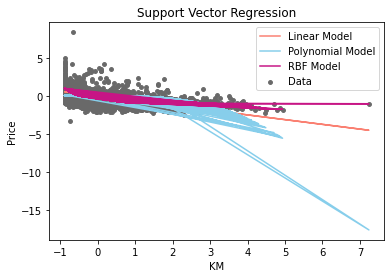

In [38]:
linear_support_X = X[linearRegressor.support_]
linear_support_y = y[linearRegressor.support_]
# Polynomial Support Vectors
poly_support_X = X[polyRegressor.support_]
poly_support_y = y[polyRegressor.support_]
# RBF Support Vectors
rbf_support_X = X[rbfRegressor.support_]
rbf_support_y = y[rbfRegressor.support_]
plt.scatter(X, y, color='dimgray', label='Data', s=15)
# plt.scatter(linear_support_X, linear_support_y, facecolor = 'none', edgecolor= 'salmon', label='Linear Support Vectors', marker='.', s=50)
plt.plot(X, linearRegressor.predict(X), color = 'salmon', label='Linear Model')
# plt.scatter(poly_support_X, poly_support_y, facecolor = 'none', edgecolor= 'skyblue', label='Polynomial Support Vectors', marker='.', s=50)
plt.plot(X, polyRegressor.predict(X), color = 'skyblue', label='Polynomial Model')
# plt.scatter(rbf_support_X, rbf_support_y, facecolor = 'none', edgecolor= 'mediumvioletred', label='RBF Support Vectors', marker='.', s=50)
plt.plot(X, rbfRegressor.predict(X), color = 'mediumvioletred', label='RBF Model')
plt.title('Support Vector Regression')
plt.xlabel('KM')
plt.ylabel('Price')
plt.legend()
plt.show()